In [1]:
from src.utils.PathManager import Paths as Path 
from src.utils.Visualisation import plot_ROC_simple
from src.utils.BayesianLabel import BayesianLabeler as Labeller 
from src.utils.FeatureExtractor import *
import pandas as pd 
import numpy as np 
from datetime import timedelta
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [12]:
well_code = "POND1"

In [13]:
model = FeatureExtractor(well_code)

## Get dawn gradient label 

In [14]:
gradient_label_df = model.get_dawn_VOLTAGE_drop_failure_label()

In [15]:
model.evaluate_labeller(gradient_label_df,verbose=False)

{'precision': 0.9841269841269841,
 'recall': 1.0,
 'accuracy': 0.9995437956204379,
 'true_pos': 62,
 'false_pos': 1,
 'true_neg': 2129,
 'false_neg': 0}

## Get dawn data-outage label

In [16]:
outage_label_df = model.get_data_outage_failure_label()

In [17]:
model.evaluate_labeller(outage_label_df)

{'precision': 0.625,
 'recall': 0.08064516129032258,
 'accuracy': 0.9726277372262774,
 'true_pos': 5,
 'false_pos': 3,
 'true_neg': 2127,
 'false_neg': 57}

# Get charging fault label 

In [ ]:
charging_fault_label = model.get_charging_fault_label()

In [ ]:
len(charging_fault_label[charging_fault_label==1])

In [ ]:
charging_fault_label[charging_fault_label==1]

In [ ]:
charging_fault_label.name = "labels"
plot_ROC_simple(model.data['raw_df'],charging_fault_label.to_frame(),"2022-05-09","2022-08-14")
plt.show()

## Get weather label

In [4]:
weather_label = model.get_weather_label()


In [7]:
weather_label[weather_label==1]

2016-08-01    1
2016-08-02    1
2016-08-09    1
2016-08-10    1
2016-08-16    1
             ..
2022-05-29    1
2022-05-31    1
2022-06-01    1
2022-06-02    1
2022-06-03    1
Name: labels, Length: 304, dtype: int32

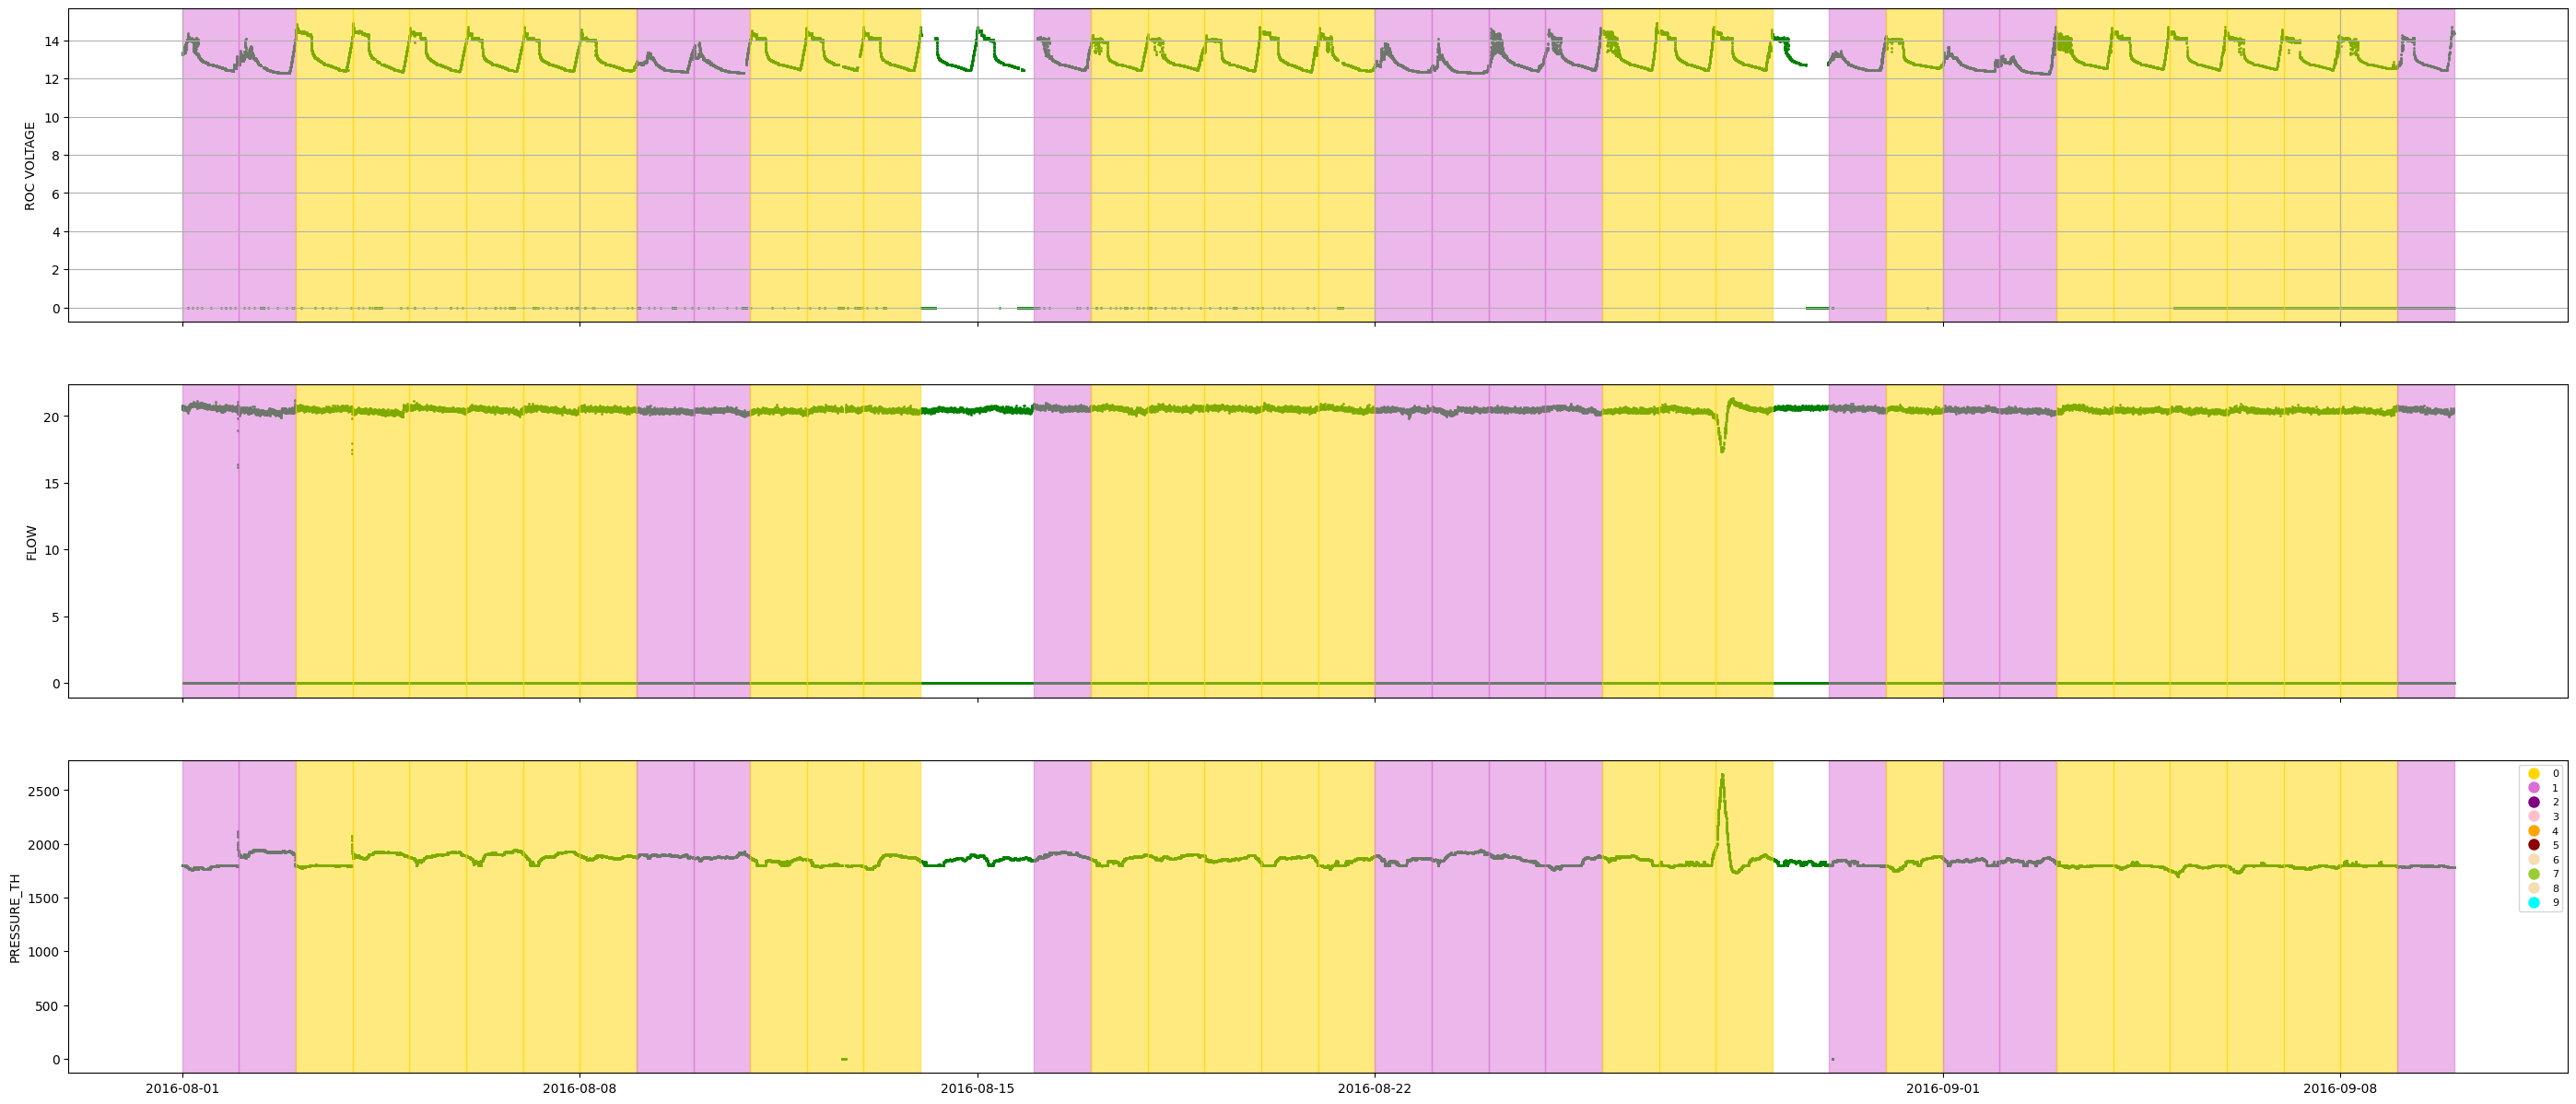

In [10]:
plot_ROC_simple(model.data['raw_df'],weather_label.to_frame(),"2016-08-01","2016-09-09")
plt.show()

## Get data anomaly label

In [ ]:
anomaly_data = model.anomaly_label

In [ ]:
plot_ROC_simple(model.data['raw_df'],anomaly_data.to_frame(),"2016-07-01","2016-09-20")
plt.show()

In [ ]:
x = model.data["agg_df"].loc["2016-08-15"].Mask_ROC_VOLTAGE
[len(list(g)) for k,g in groupby(x) if k==0] 

In [ ]:
plt.plot(model.data["agg_df"].loc["2016-07-03"].ROC_VOLTAGE)

## Get relative minimum VOLTAGE label

In [4]:
model.interpolated_VOLTAGE

,ROC_VOLTAGE
2016-06-30,"[14.59902, 14.34624004, 13.85719013, 14.773329..."
2016-07-01,"[14.42926025, 14.43959045, 14.43587017, 14.477..."
2016-07-02,"[14.63632965, 14.53540993, 14.37267017, 14.190..."
2016-07-03,"[14.67873955, 14.64527988, 14.60439014, 14.624..."
2016-07-04,"[14.43381023, 14.44042015, 14.44672966, 14.420..."
...,...
2022-06-11,"[13.25329018, 13.25329018, 13.254002193, 13.25..."
2022-06-12,"[12.67378998, 12.71813011, 12.67815018, 12.613..."
2022-06-13,"[13.05932999, 13.05932999, 13.05932999, 13.061..."
2022-06-14,"[13.16145992, 13.16145992, 13.16145992, 13.161..."
